# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Завантаження даних
df = pd.read_csv('/Users/nataliapodziolkina/Documents/data/yulu_rental (1).csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [17]:
monthly_avg = df['count'].resample('MS').mean()

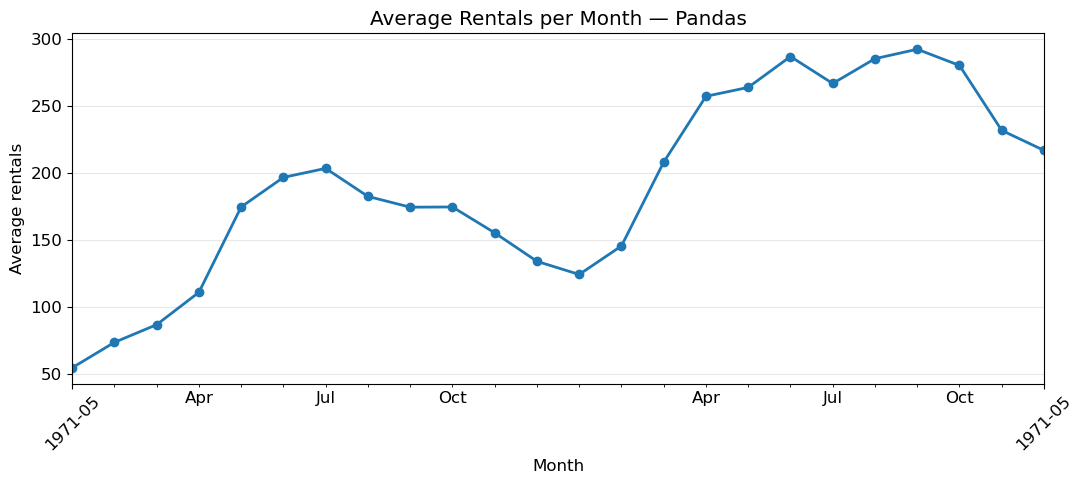

In [18]:
#1. Використовуючи Pandas (DataFrame.plot())


ax = monthly_avg.plot(
    kind='line',
    marker='o',
    linewidth=2,
    color='#1f77b4',
    figsize=(11, 5),
    title='Average Rentals per Month — Pandas'
)

ax.set_xlabel('Month')
ax.set_ylabel('Average rentals')
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


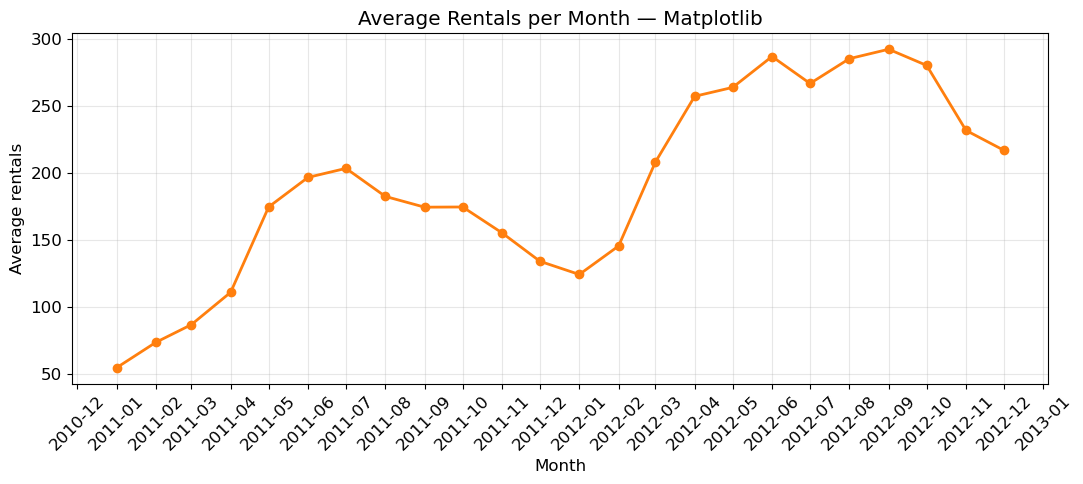

In [19]:
#2. Використовуючи Matplotlib безпосередньо

fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    linewidth=2,
    color='#ff7f0e'
)

ax.set_title('Average Rentals per Month — Matplotlib')
ax.set_xlabel('Month')
ax.set_ylabel('Average rentals')
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

Графік з Matplotlib візуально симпатичніший, дуже зручно розбиті місяці. В Пандас треба більше часу приділити щоб привести місяці в порядок  

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [20]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

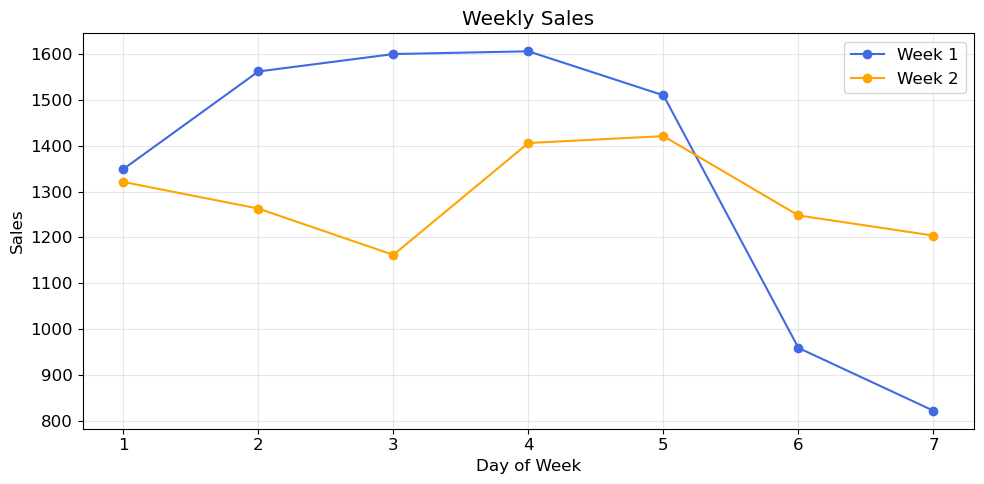

✅ Продажі стабільніші у Week 2.


In [21]:


# 1️⃣ Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(days, sales_week1, marker='o', color='royalblue', label='Week 1')
plt.plot(days, sales_week2, marker='o', color='orange', label='Week 2')

plt.title('Weekly Sales')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 2️⃣ Обчислення стабільності — стандартне відхилення
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

# 3️⃣ Висновок
if std_week1 < std_week2:
    print("✅ Продажістабільніші у Week 1.")
elif std_week2 < std_week1:
    print("✅ Продажі стабільніші у Week 2.")
else:
    print("📊 Продажі мали однакову стабільність.")


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

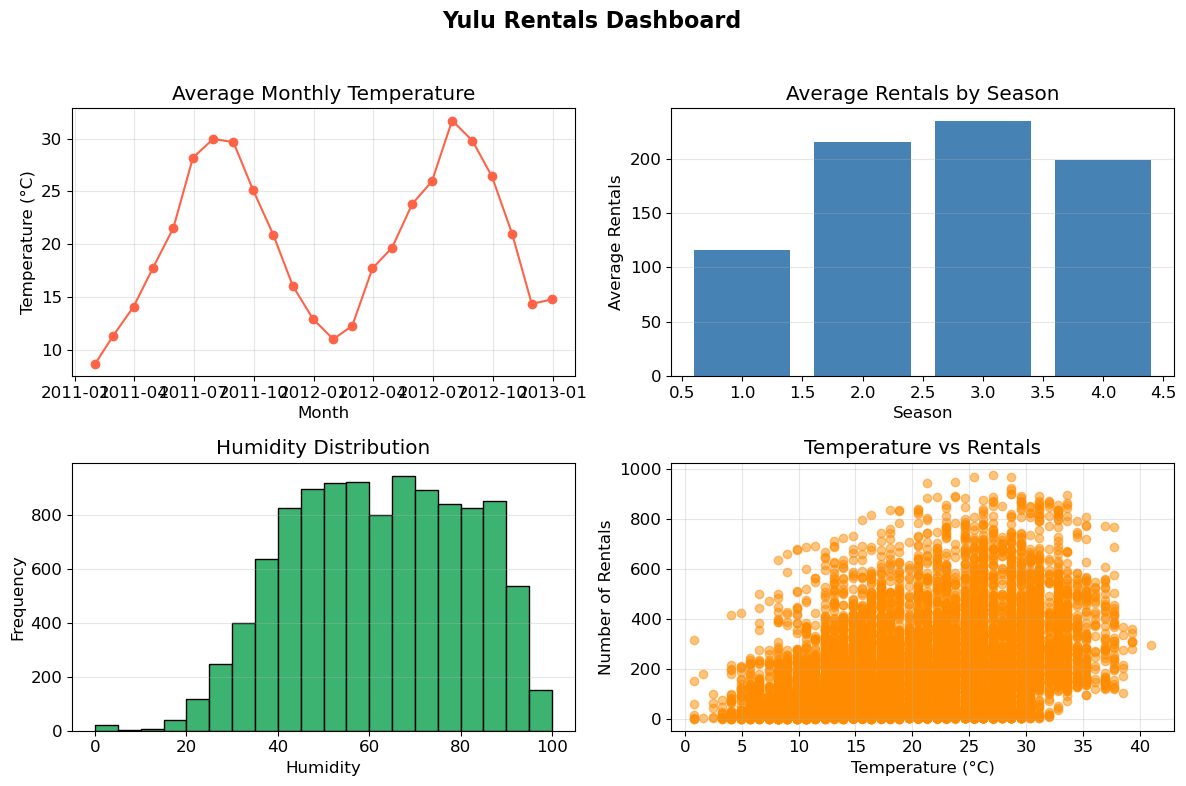

In [22]:
import matplotlib.pyplot as plt

# 1️⃣ Агрегації для графіків
# (a) Середня температура помісячно
monthly_temp = df['temp'].resample('ME').mean()

# (b) Середня кількість оренд за сезонами
season_avg = df.groupby('season')['count'].mean()

#  фігура
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Yulu Rentals Dashboard', fontsize=16, fontweight='bold')

# Лінійний графік середньої температури помісячно
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, color='tomato', marker='o')
axs[0, 0].set_title('Average Monthly Temperature')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True, alpha=0.3)

# Стовпчикова діаграма середньої кількості оренд за сезонами
axs[0, 1].bar(season_avg.index, season_avg.values, color='steelblue')
axs[0, 1].set_title('Average Rentals by Season')
axs[0, 1].set_xlabel('Season')
axs[0, 1].set_ylabel('Average Rentals')
axs[0, 1].grid(axis='y', alpha=0.3)

# Гістограма вологості
axs[1, 0].hist(df['humidity'], bins=20, color='mediumseagreen', edgecolor='black')
axs[1, 0].set_title('Humidity Distribution')
axs[1, 0].set_xlabel('Humidity')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(axis='y', alpha=0.3)

#  Scatter plot: температура vs кількість оренд
axs[1, 1].scatter(df['temp'], df['count'], color='darkorange', alpha=0.5)
axs[1, 1].set_title('Temperature vs Rentals')
axs[1, 1].set_xlabel('Temperature (°C)')
axs[1, 1].set_ylabel('Number of Rentals')
axs[1, 1].grid(True, alpha=0.3)

#  оформлення 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

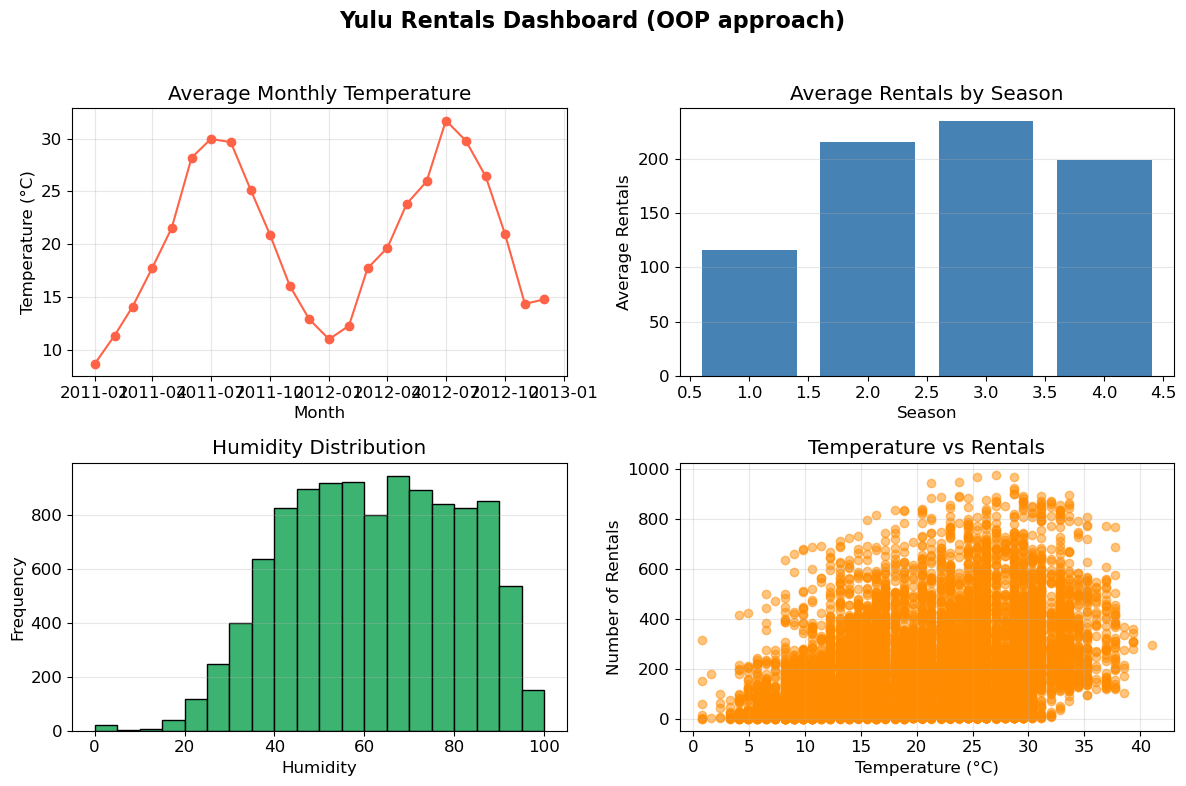

In [23]:
import matplotlib.pyplot as plt

#  Агрегація 
monthly_temp = df['temp'].resample('MS').mean()
season_avg = df.groupby('season')['count'].mean()

# Фігура
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Yulu Rentals Dashboard (OOP approach)', fontsize=16, fontweight='bold')

#  Лінійний графік середньої температури помісячно
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, color='tomato', marker='o')
ax[0, 0].set_title('Average Monthly Temperature')
ax[0, 0].set_xlabel('Month')
ax[0, 0].set_ylabel('Temperature (°C)')
ax[0, 0].grid(True, alpha=0.3)

#  Стовпчикова діаграма середньої кількості оренд за сезонами
ax[0, 1].bar(season_avg.index, season_avg.values, color='steelblue')
ax[0, 1].set_title('Average Rentals by Season')
ax[0, 1].set_xlabel('Season')
ax[0, 1].set_ylabel('Average Rentals')
ax[0, 1].grid(axis='y', alpha=0.3)

# Гістограма вологості
ax[1, 0].hist(df['humidity'], bins=20, color='mediumseagreen', edgecolor='black')
ax[1, 0].set_title('Humidity Distribution')
ax[1, 0].set_xlabel('Humidity')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].grid(axis='y', alpha=0.3)

#  Scatter plot: температура vs кількість оренд
ax[1, 1].scatter(df['temp'], df['count'], color='darkorange', alpha=0.5)
ax[1, 1].set_title('Temperature vs Rentals')
ax[1, 1].set_xlabel('Temperature (°C)')
ax[1, 1].set_ylabel('Number of Rentals')
ax[1, 1].grid(True, alpha=0.3)

# Оформлення 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

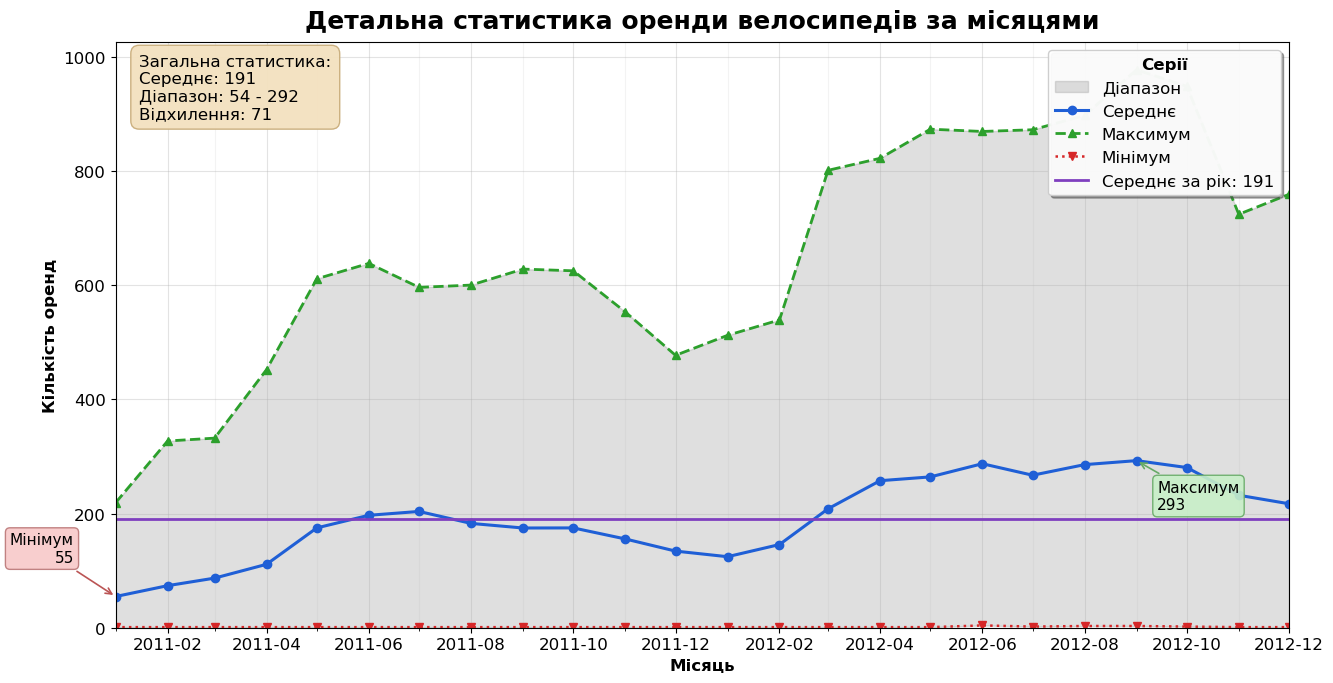

In [24]:


# Місячна агрегація
monthly = df['count'].resample('MS').agg(['min', 'mean', 'max']).dropna()

# Базові статистики 
overall_mean = monthly['mean'].mean()
overall_std  = monthly['mean'].std()
rng_min, rng_max = monthly['mean'].min(), monthly['mean'].max()

# Індекси для анотацій (найнижчий і найвищий місячний середній)
min_idx = monthly['mean'].idxmin(); min_val = monthly.loc[min_idx, 'mean']
max_idx = monthly['mean'].idxmax(); max_val = monthly.loc[max_idx, 'mean']

# Оформлення
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(13.5, 7))

# Заголовок
ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=18, fontweight='bold', pad=10)

# Заливка діапазону (мін–макс)
ax.fill_between(monthly.index, monthly['min'], monthly['max'],
                color='gray', alpha=0.25, label='Діапазон')

# Три лінії з різними стилями + маркерами
ax.plot(monthly.index, monthly['mean'], '-o',  lw=2.2, color='#1f5fd6',
        label='Середнє')
ax.plot(monthly.index, monthly['max'],  '--^', lw=2.0, color='#2ca02c',
        label='Максимум', markersize=6)
ax.plot(monthly.index, monthly['min'],  ':v',  lw=1.8, color='#d62728',
        label='Мінімум',  markersize=6)

# Горизонтальна лінія “Середнє за рік”
ax.axhline(overall_mean, color='#7f3fbf', lw=2, ls='-',
           label=f'Середнє за рік: {overall_mean:.0f}')

# Анотації (мін/макс) з фоном
ax.annotate(f'Мінімум\n{min_val:.0f}', xy=(min_idx, min_val),
            xytext=(-30, 25), textcoords='offset points',
            bbox=dict(boxstyle='round', fc='#f8c9c9', ec='#b77', alpha=0.9),
            arrowprops=dict(arrowstyle='->', lw=1.2, color='#b55'),
            ha='right', fontsize=11)

ax.annotate(f'Максимум\n{max_val:.0f}', xy=(max_idx, max_val),
            xytext=(15, -35), textcoords='offset points',
            bbox=dict(boxstyle='round', fc='#c8efc8', ec='#6a6', alpha=0.9),
            arrowprops=dict(arrowstyle='->', lw=1.2, color='#6a6'),
            ha='left', fontsize=11)

# Мітки часу
ax.set_xlabel('Місяць', fontweight='bold')
ax.set_ylabel('Кількість оренд', fontweight='bold')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())             

ax.grid(which='major', alpha=0.35)
ax.grid(which='minor', alpha=0.15)
ax.set_xlim(monthly.index.min(), monthly.index.max())
ax.set_ylim(0, max(monthly['max']) * 1.05)  

# Легенда 
leg = ax.legend(frameon=True, framealpha=0.95, shadow=True, title='Серії', loc='upper right')
if leg.get_title(): leg.get_title().set_fontweight('bold')

# Текстовий блок 
text = (f"Загальна статистика:\n"
        f"Середнє: {overall_mean:.0f}\n"
        f"Діапазон: {int(rng_min)} - {int(rng_max)}\n"
        f"Відхилення: {overall_std:.0f}")
ax.text(0.02, 0.98, text, transform=ax.transAxes, va='top', ha='left',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#f3e1bf',
                  edgecolor='#c9ad7b', alpha=0.95))

plt.tight_layout()
plt.show()


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?


----------

1. Анотації підкреслюють важливі точки (піки, спади) й спрощують сприйняття графіка.

2. fill_between() показує діапазон між двома лініями, візуалізує розкид даних.

3. Текстовий блок коротко подає ключові статистики прямо на графіку.